### Module 1: Data Exploration
Load `creditcard_train.csv` and explore the dataset. Meanwhile, handling outliers and missing data. <br> For removal of extreme outliers : 
remove samples that are smaller than Q1 - 2.5 * IQR or larger than Q3 + 2.5 * IQR, where Q1=df.quantile(0.25); Q3=df.quantile(0.75); IQR=Q3-Q1 <br>

In [1]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns 
import numpy as np
import pandas as pd
pd.options.display.max_columns = 32
train = pd.read_csv('creditcard_train.csv')

After loading the dataset using panda, I first briefly study  its structure, summary statistic, and existence of missing value and outliers.

In [2]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
train.shape

(284657, 31)

In [4]:
train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

   The dataset contains 284657 transaction records and 31 variables, including V1 to V28, Time, Amount, and Class.

In [5]:
train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284379.000000,284137.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000
mean,94820.043168,0.000942,-0.000761,0.001280,-0.000844,0.000591,0.000233,0.000956,-0.000145,0.000553,0.001220,-0.000789,0.001301,-0.000026,0.001392,0.000093,0.000833,0.001378,0.000467,-0.000078,-0.000092,-0.000075,-0.000035,0.000011,0.000045,-0.000016,0.000008,-0.000056,-0.000008,88.340966,0.001553
std,47486.331846,1.955946,1.649907,1.510265,1.413999,1.378060,1.332089,1.230796,1.192554,1.097575,1.083311,1.018266,0.992078,0.995291,0.950934,0.915270,0.872257,0.837035,0.836578,0.813759,0.770867,0.733731,0.725929,0.625052,0.605657,0.521244,0.482238,0.403245,0.330077,250.129519,0.039374
min,0.000000,-56.407510,-72.715728,-48.325590,-5.683171,-113.743300,-26.160506,-43.557240,-73.216718,-13.434070,-24.588260,-4.797473,-18.683710,-5.791881,-19.214325,-4.498945,-14.129850,-24.019099,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565680,-15.430080,0.000000,0.000000
25%,54208.000000,-0.920083,-0.598696,-0.889759,-0.848833,-0.691445,-0.768153,-0.553921,-0.208633,-0.642783,-0.535141,-0.762556,-0.405263,-0.648589,-0.425267,-0.582729,-0.467742,-0.483646,-0.498668,-0.456291,-0.211747,-0.228421,-0.542878,-0.162192,-0.354543,-0.317147,-0.326978,-0.070844,-0.052954,5.600000,0.000000
50%,84704.000000,0.018393,0.065213,0.179930,-0.020146,-0.054336,-0.274058,0.040115,0.022323,-0.051198,-0.092736,-0.032942,0.140170,-0.013587,0.050731,0.048170,0.066504,-0.065551,-0.003449,0.003729,-0.062507,-0.029518,0.007694,-0.011614,0.041012,0.016532,-0.052152,0.001326,0.011233,22.000000,0.000000
75%,139324.000000,1.315753,0.803360,1.027294,0.742826,0.611926,0.398611,0.570420,0.327241,0.597343,0.454159,0.739310,0.618276,0.662503,0.493239,0.648848,0.523349,0.399695,0.500838,0.458794,0.132994,0.186287,0.529204,0.148051,0.439603,0.350702,0.240932,0.091001,0.078243,77.150000,0.000000
max,172792.000000,2.454930,22.057730,9.382558,16.875340,34.801666,73.301630,120.589500,20.007208,15.594990,23.745140,12.018913,7.848392,7.126883,10.526766,8.877742,17.315110,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528410,4.584549,7.519589,3.517346,31.612200,33.847808,25691.160000,1.000000


The table above shows that
- Mean of variables V1 to V28 are approximately 0 and the corresponding standard deviation are within the range 0.33 to 1.99, indicating that the V1 to V28 are closely distributed around 0, possibly forming normal distribution.

- The transaction amount is recorded to be ranged from \\$0 to \\$25691 while the mean is \\$88 show that the distribution of transaction amount is dispersed, possibly caused by inclusion of outliers. 

- Mean of class obtains 0.001553, implying that the majority of transaction is valid, fraud transactions occur once every thousand transactions.

In [6]:
train.isnull().values.any()

True

In [7]:
train.isnull().sum() 

Time        0
V1          0
V2          0
V3          0
V4          0
V5          0
V6          0
V7          0
V8          0
V9          0
V10         0
V11         0
V12         0
V13         0
V14         0
V15         0
V16         0
V17         0
V18         0
V19         0
V20         0
V21         0
V22       278
V23       520
V24         0
V25         0
V26         0
V27         0
V28         0
Amount      0
Class       0
dtype: int64

In [8]:
print('Total missing value : ', train.isnull().sum().sum())

Total missing value :  798


The dataset has 798 missing values in total that contributed from variables V22 and V23. 278 missing values exist at V22 and 520 missing values exist at V23. 

To further explores the dataset, I create 2 subsets fraud and valid  from the original dataset train by their class to study their distribution and summary statistic.

In [3]:
fraud = train[train['Class'] == 1]
valid = train[train['Class'] == 0]

In [10]:
print('Fraud :', len(fraud), '  Percentage :', round(len(fraud)/len(train)*100, 2), '%')

print('Valid :', len(valid), '  Percentage :', round(len(valid)/len(train)*100,2), '%')


Fraud : 442   Percentage : 0.16 %
Valid : 284215   Percentage : 99.84 %


In [11]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
622,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4916,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6104,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6325,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
6327,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,-6.187891,5.664395,-9.854485,-0.306167,-10.691196,-0.638498,-2.041974,-1.129056,0.116453,-1.934666,0.488378,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1


In [12]:
valid.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


There are 442 fraud transactions that account for 0.16% of all transaction made in 2 days. The first fraud transactions happens to be the 622th transaction, therefore, the first 5 valid transaction is exactly same as the dataset train and the majorty of 99.84% made up of 284215 valid transactions.

In [13]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.0
mean,81877.730769,-4.739654,3.599867,-6.968586,4.497262,-3.100015,-1.398321,-5.526510,0.561622,-2.551473,-5.569682,3.728979,-6.119122,-0.111128,-6.850513,-0.062848,-4.066999,-6.538137,-2.198089,0.699262,0.364306,0.753739,-0.011382,-0.042574,-0.104746,0.034776,0.049510,0.155221,0.082283,119.798710,1.0
std,47976.340768,6.806590,4.303734,7.117649,2.879266,5.416967,1.879924,7.171960,6.955183,2.492465,4.858667,2.614932,4.586596,1.120902,4.241022,1.038677,3.814453,6.879133,2.879962,1.521983,1.348560,3.970519,1.512117,1.640916,0.520659,0.797282,0.474039,1.369278,0.546047,250.677832,0.0
min,472.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557240,-41.044260,-13.434070,-24.588260,-1.702228,-18.683710,-3.127795,-19.214325,-4.498945,-14.129850,-24.019099,-9.498746,-3.681904,-4.128186,-22.797600,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41309.250000,-5.996596,1.178110,-8.512244,2.362414,-4.713733,-2.520242,-7.765017,-0.200224,-3.870535,-7.325234,1.979706,-8.576761,-0.983170,-9.495391,-0.611425,-6.511108,-11.791925,-4.554367,-0.228716,-0.172064,0.082890,-0.532045,-0.332231,-0.445282,-0.318323,-0.255973,-0.026555,-0.097935,1.000000,1.0
50%,76276.500000,-2.315136,2.677269,-5.043392,4.091572,-1.476892,-1.421577,-3.016983,0.621508,-2.081997,-4.538063,3.550375,-5.399495,-0.071016,-6.672577,-0.044548,-3.504256,-5.221650,-1.552518,0.669004,0.287990,0.600567,0.039953,-0.073135,-0.056273,0.072204,0.000308,0.389980,0.142945,10.850000,1.0
75%,129286.500000,-0.417960,5.063356,-2.274713,6.317732,0.215958,-0.374131,-1.009233,1.722112,-0.786775,-2.567668,5.218297,-2.904004,0.675322,-4.213908,0.638513,-1.210213,-1.311079,0.092376,1.667794,0.817065,1.222590,0.610890,0.298357,0.278836,0.447350,0.395235,0.790027,0.373473,105.620000,1.0
max,170348.000000,2.132386,22.057730,2.250210,12.114670,11.095090,6.474115,5.802537,20.007208,3.353525,4.031435,12.018913,1.375941,2.815440,3.442422,2.471358,3.139656,6.739384,3.790316,5.228342,11.059000,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [14]:
valid.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284215.000000,284215.000000,284215.000000,284215.000000,284215.000000,284215.000000,284215.000000,284215.000000,284215.000000,284215.000000,284215.000000,284215.000000,284215.000000,284215.000000,284215.000000,284215.000000,284215.000000,284215.000000,284215.000000,284215.000000,284215.000000,284215.000000,283937.000000,283695.000000,284215.000000,284215.000000,284215.000000,284215.000000,284215.000000,284215.000000,284215.0
mean,94840.170543,0.008314,-0.006360,0.012119,-0.007839,0.005413,0.002408,0.009552,-0.001019,0.004521,0.009884,-0.006590,0.010819,0.000147,0.012048,0.000191,0.007159,0.011548,0.003886,-0.001166,-0.000659,-0.001247,-0.000018,0.000077,0.000208,-0.000070,-0.000069,-0.000298,-0.000136,88.292044,0.0
std,47482.903903,1.929970,1.636304,1.459511,1.399331,1.357018,1.329921,1.178904,1.161398,1.089386,1.044231,1.003096,0.945918,0.995076,0.897021,0.915064,0.844787,0.749452,0.824956,0.811712,0.769501,0.716834,0.724046,0.622182,0.605766,0.520701,0.482248,0.399891,0.329616,250.126026,0.0
min,0.000000,-56.407510,-72.715728,-48.325590,-5.683171,-113.743300,-26.160506,-31.764946,-73.216718,-6.290730,-14.741096,-4.797473,-15.144988,-5.791881,-18.392090,-4.391307,-10.115560,-17.098444,-5.366660,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565680,-15.430080,0.000000,0.0
25%,54230.500000,-0.917561,-0.599553,-0.884603,-0.850095,-0.689556,-0.766857,-0.551500,-0.208634,-0.640376,-0.532834,-0.763488,-0.402176,-0.648134,-0.422538,-0.582666,-0.465543,-0.482644,-0.497414,-0.456392,-0.211781,-0.228522,-0.542920,-0.161977,-0.354392,-0.317145,-0.327048,-0.070852,-0.052949,5.660000,0.0
50%,84717.000000,0.020168,0.063984,0.182065,-0.022399,-0.053591,-0.273112,0.041083,0.022039,-0.049872,-0.091799,-0.034968,0.141641,-0.013586,0.051934,0.048324,0.067381,-0.064807,-0.002748,0.003126,-0.062664,-0.029829,0.007665,-0.011570,0.041103,0.016413,-0.052205,0.001228,0.011195,22.000000,0.0
75%,139333.000000,1.316310,0.800388,1.028378,0.737638,0.612162,0.399605,0.570959,0.326139,0.598278,0.455249,0.736444,0.619188,0.662471,0.494077,0.648859,0.523769,0.399957,0.501113,0.457484,0.132401,0.185613,0.529123,0.147939,0.439886,0.350601,0.240711,0.090562,0.077951,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875340,34.801666,73.301630,120.589500,18.709255,15.594990,23.745140,10.002190,7.848392,7.126883,10.526766,8.877742,17.315110,9.253526,5.041069,5.591971,39.420904,22.614889,10.503090,22.528410,4.584549,7.519589,3.517346,31.612200,33.847808,25691.160000,0.0


Comparing the above 2 tables, 
- Mean of fraud transaction amount is higher than the mean of valid transactions, however the maximum amount of valid transactions is 10 times higher. 
- Mean of variables V1 to V28 obtain opposite result in fraud and valid transaction specified by opposite + and - signs most of the cases.
- Mean of fraud transactions tends to be vary to 0 for V1 to V28, while mean of V1 to V28 obtains 0 in valid transactions. Meanwhile, standard deviation of V1 to V28 vary in fraud transaction, ranging from 0.47 to 7.11, while valid transaction have a smaller standard deviation, ranging from 0.33 to 1.93, implying that more variability exist in fraud transactions.

The following examines the distribution of the missing values and further handling the missing values.

In [15]:
fraud.isnull().values.any()

False

In [16]:
valid.isnull().values.any()

True

The results indicate all 798 missing values come from the data set valid and concentrated at V22 and V23

So to let the data set keeps its accuracy and consistency, the missing values will be dropped instead of imputation.

In [17]:
train.dropna(how = 'any', inplace = True)
train.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [18]:
valid = train[train['Class'] == 0]
print('Total missing value : ', valid.isnull().sum().sum())

Total missing value :  0


The 798 missing values in V22 and V23 of data set valid are removed.

The following identifies the existence of outliers, evaluates its effects on model and deals with the outliers.

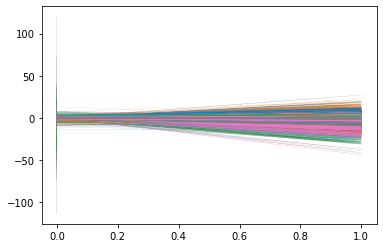

In [19]:
figure, ax1 = plt.subplots()
for x in range(1,29):
    ax1.plot(train.iloc[:,-1],train.iloc[:,x],linewidth=0.1,label = "V" + str(x))

/Users/user/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


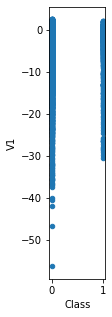

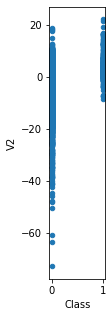

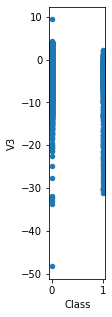

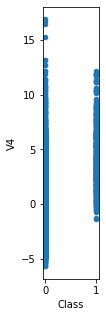

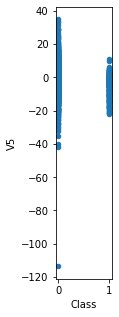

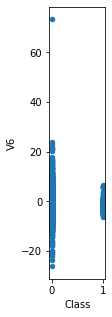

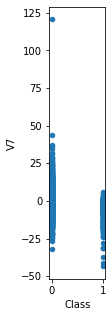

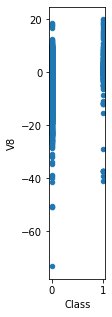

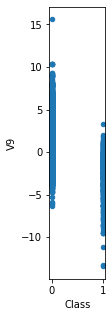

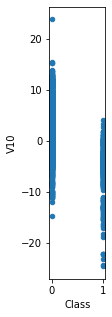

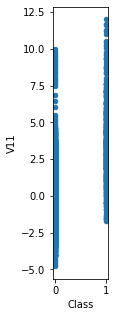

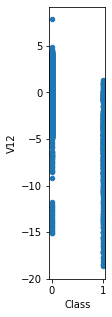

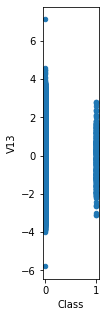

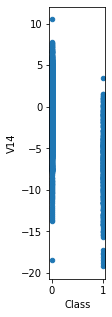

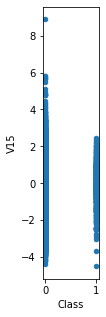

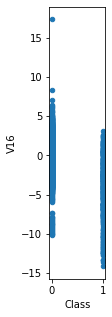

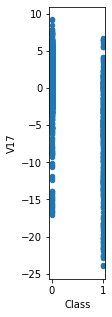

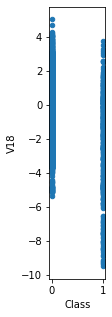

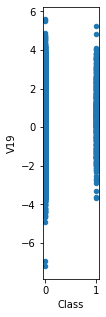

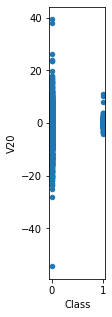

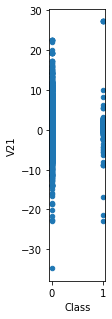

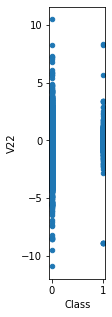

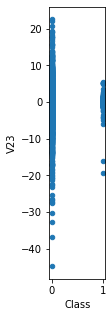

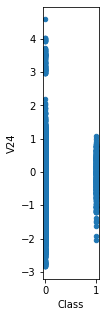

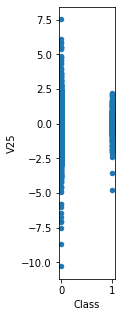

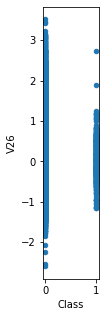

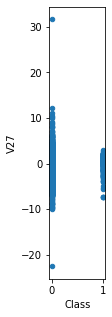

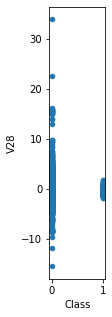

In [20]:
for x in range(1,29):
    train.plot(kind = 'scatter', x = 'Class', y = 'V' + str(x) , figsize = (1,5))

After checking the distribution of V1 to V28 for both fraud and valid, we are able to observe that distribution of valid are way disper than fraud and outliers exist in both fraud and valid, particularly serious in valid. Then now I will try to delete the outliers by removing samples that are smaller than Q1 - 2.5 * IQR or larger than Q3 + 2.5 * IQR.

In [4]:
Q1=fraud.quantile(0.25)
Q3=fraud.quantile(0.75)
IQR=Q3-Q1;
#print(IQR)
fraud_new = fraud[~((fraud < (Q1 - 2.5 * IQR)) |(fraud > (Q3 + 2.5 * IQR)))
                 .any(axis=1)]
print(fraud_new.shape)


Q1=valid.quantile(0.25)
Q3=valid.quantile(0.75)
IQR=Q3-Q1;
#print(IQR)
valid_new = valid[~((valid < (Q1 - 2.5 * IQR)) |(valid > (Q3 + 2.5 * IQR)))
                 .any(axis=1)]
print(valid_new.shape)

train_new = pd.concat([valid_new,fraud_new])
print(train_new.shape)

print('\n',len(fraud)-len(fraud_new),'outliers are removed at fraud and', len(valid)-len(valid_new), 'outliers are removed at valid, where total',len(fraud)-len(fraud_new) + len(valid)-len(valid_new),'outliers are removed.')
print('\nNew Fraud :', len(fraud_new), '  Percentage :', round(len(fraud_new)/len(train_new)*100,2), '%')
print('New Valid :', len(valid_new), '  Percentage :', round(len(valid_new)/len(train_new)*100,2), '%')

(308, 31)
(212908, 31)
(213216, 31)

 134 outliers are removed at fraud and 71307 outliers are removed at valid, where total 71441 outliers are removed.

New Fraud : 308   Percentage : 0.14 %
New Valid : 212908   Percentage : 99.86 %


In [22]:
fraud_new.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.0
mean,85608.964286,-2.035977,2.483573,-4.554398,3.931333,-1.218007,-1.454127,-3.286465,0.867845,-2.160153,-4.548811,3.529376,-5.616226,-0.155014,-6.850682,-0.035164,-3.490140,-5.450948,-1.656750,0.554751,0.284347,0.601929,0.076162,-0.051932,-0.156580,0.064312,0.082476,0.336770,0.175021,54.865227,1.0
std,49024.501354,2.997965,2.207960,3.673303,2.453629,2.785960,1.267474,3.547229,1.677079,1.866677,3.475164,2.540902,4.415784,1.083244,4.155113,1.012053,3.735822,6.480201,2.635715,1.578397,0.631095,0.837988,0.651043,0.430865,0.496578,0.635534,0.453913,0.732134,0.398265,91.335515,0.0
min,4462.000000,-15.398845,-7.449015,-19.026912,-1.255593,-11.318470,-6.406267,-17.640470,-4.892184,-7.368451,-15.346100,-1.702228,-18.683710,-3.127795,-19.214325,-3.642393,-14.129850,-24.019099,-9.335193,-3.681904,-2.286137,-2.457145,-1.185443,-1.667801,-1.929717,-2.079928,-1.152671,-2.042403,-1.229992,0.000000,1.0
25%,44497.250000,-3.778814,1.252385,-6.199472,2.131078,-2.365283,-2.265153,-4.604062,0.009891,-3.220517,-6.051050,1.911912,-7.612738,-0.992473,-9.414161,-0.653909,-5.391661,-9.253387,-3.117052,-0.514978,-0.095640,0.116755,-0.453189,-0.279079,-0.449178,-0.278850,-0.250136,0.009771,0.005020,1.000000,1.0
50%,77176.500000,-1.372700,2.372788,-4.461143,3.818793,-0.805243,-1.416612,-2.438536,0.621508,-1.874395,-4.066677,3.280185,-4.951060,-0.142809,-6.445450,-0.010604,-2.776842,-4.655140,-1.108334,0.515534,0.280724,0.549778,0.039953,-0.074621,-0.165681,0.088371,0.064584,0.402449,0.157813,4.935000,1.0
75%,135788.250000,0.286715,3.553173,-1.928993,5.506255,0.474658,-0.613867,-0.914319,1.474577,-0.784472,-2.614184,4.704893,-2.765150,0.597471,-4.420305,0.709115,-0.862125,-0.485788,0.227745,1.720917,0.562997,1.080801,0.511834,0.175330,0.219523,0.418598,0.415126,0.637615,0.356850,80.390000,1.0
max,170348.000000,2.132386,9.067613,2.250210,11.165526,6.198304,2.914673,1.987616,6.442909,1.242229,4.031435,12.018913,1.375941,2.815440,1.571080,2.344651,3.139656,6.739384,3.790316,4.851255,3.136338,2.839596,2.151787,1.850627,0.994110,1.701796,1.884741,2.352333,1.521218,362.550000,1.0


In [23]:
valid_new.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.000000,212285.0
mean,95174.378812,0.496369,0.079312,0.164066,0.000372,-0.023927,-0.205589,0.011308,0.076677,-0.041450,-0.048080,0.002450,0.045077,-0.007894,0.018370,-0.012042,0.018193,-0.038385,-0.022324,0.002309,-0.068018,-0.025552,0.003464,-0.000688,-0.025979,0.003372,-0.001562,0.021928,0.012164,41.900266,0.0
std,47382.889814,1.275829,0.827151,1.260473,1.281904,0.910766,0.897689,0.712312,0.381198,0.974767,0.738550,0.991752,0.855146,1.012109,0.742960,0.889429,0.779493,0.628622,0.791835,0.733331,0.229867,0.259590,0.674807,0.216147,0.575924,0.462210,0.461506,0.144916,0.101936,53.719388,0.0
min,0.000000,-5.536010,-4.098951,-4.846779,-4.817064,-3.252559,-3.666150,-3.180199,-1.545302,-3.672923,-2.999375,-3.241392,-2.954782,-3.888606,-2.714682,-3.657525,-2.937583,-2.311921,-2.986109,-2.739019,-1.067777,-1.251701,-2.659080,-0.935596,-2.337548,-1.986743,-1.641329,-0.474615,-0.380416,0.000000,0.0
25%,54647.000000,-0.618701,-0.463847,-0.679596,-0.784746,-0.621554,-0.786198,-0.494786,-0.170918,-0.621692,-0.502777,-0.772138,-0.368475,-0.686299,-0.397107,-0.576015,-0.429915,-0.487398,-0.506180,-0.409480,-0.206162,-0.221611,-0.542743,-0.134228,-0.364405,-0.305474,-0.316082,-0.055083,-0.045690,4.990000,0.0
50%,84486.000000,0.999813,0.068929,0.286094,0.031151,-0.070972,-0.351294,0.044998,0.022888,-0.063103,-0.104140,-0.006235,0.162308,-0.010378,0.047961,0.036774,0.077385,-0.093561,-0.029869,0.016592,-0.084466,-0.038611,0.009671,-0.006583,0.028052,0.018538,-0.038447,0.004862,0.009533,18.910000,0.0
75%,139683.000000,1.720195,0.703054,1.088401,0.702676,0.492555,0.189053,0.513076,0.267003,0.534598,0.341594,0.757584,0.625911,0.683451,0.453185,0.623043,0.501006,0.345127,0.459429,0.437310,0.064958,0.155582,0.514043,0.130278,0.401641,0.340941,0.221758,0.078573,0.056220,57.160000,0.0
max,172792.000000,2.454930,3.808020,4.079168,4.704435,3.866037,3.316706,3.008217,1.663633,3.693687,2.926167,3.531399,2.601809,3.904562,2.781255,3.601890,2.686354,2.604894,2.997719,2.742536,0.993129,1.222000,2.471164,0.922715,1.307137,1.966419,1.654424,0.494365,0.405452,255.660000,0.0


Comparing the above 2 tables, 
- Mean of new fraud transaction amount is still higher than the mean of valid_new transactions.
- Mean of variables V1 to V28 obtain opposite result in new fraud and new valid transaction are not longer specified by opposite + and - signs.
- Mean of new fraud transactions still tends to be vary to 0 for V1 to V28, and mean of V1 to V28 still obtains 0 in new valid transactions. Meanwhile, standard deviation of V1 to V28 vary in new fraud transaction, ranging from 0.43 to 6.48, while new valid transaction have a smaller standard deviation, ranging from 0.10 to 1.28, implying that more variability exist in new fraud transactions.

/Users/user/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


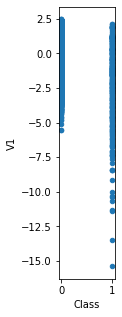

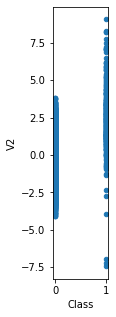

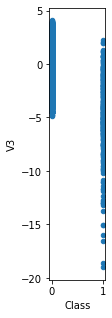

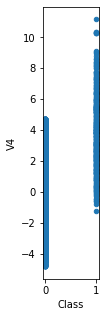

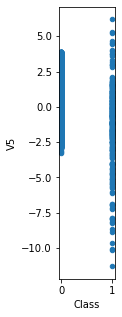

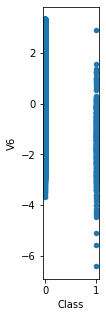

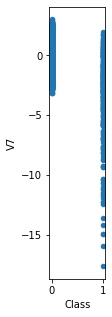

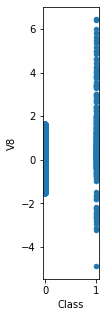

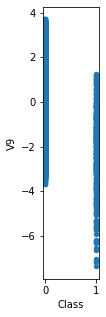

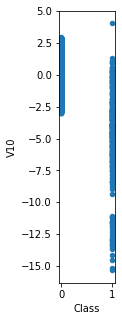

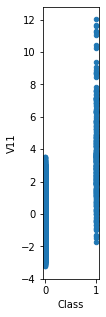

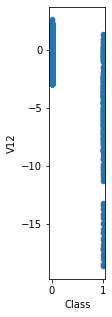

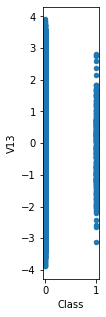

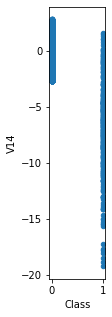

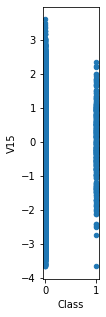

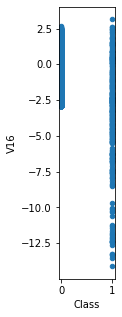

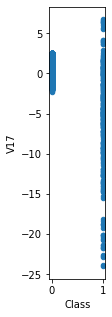

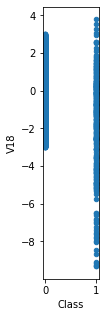

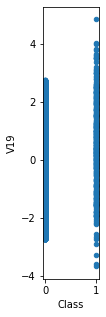

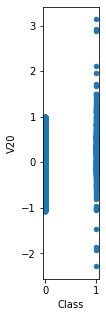

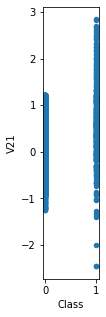

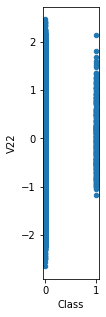

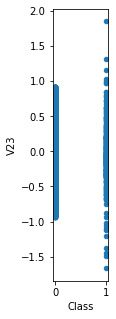

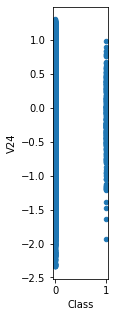

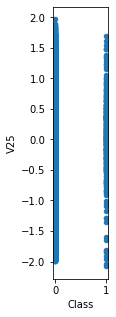

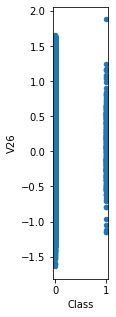

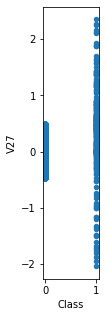

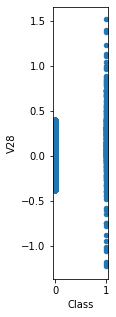

In [24]:
for x in range(1,29):
    train_new.plot(kind = 'scatter', x = 'Class', y = 'V' + str(x), figsize = (1,5))

From above 28 graphs, we can see that the distrubution of new fraud are way disper then the new valid data set after removal of outliers.